In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

In [3]:
def expderiv(y, t):
    return 0.5*y

In [4]:
y0 = 1

In [5]:
times = np.linspace(0,4,5)
times

array([ 0.,  1.,  2.,  3.,  4.])

In [6]:
odeint(expderiv, y0, times)

array([[ 1.        ],
       [ 1.64872127],
       [ 2.71828191],
       [ 4.48168924],
       [ 7.3890564 ]])

In [7]:
odeint(expderiv, y0, times, full_output=True)

(array([[ 1.        ],
        [ 1.64872127],
        [ 2.71828191],
        [ 4.48168924],
        [ 7.3890564 ]]),
 {'hu': array([ 0.14140973,  0.21095777,  0.21095777,  0.27577642]),
  'imxer': -1,
  'leniw': 21,
  'lenrw': 36,
  'message': 'Integration successful.',
  'mused': array([1, 1, 1, 1], dtype=int32),
  'nfe': array([39, 55, 63, 71], dtype=int32),
  'nje': array([0, 0, 0, 0], dtype=int32),
  'nqu': array([5, 6, 6, 7], dtype=int32),
  'nst': array([18, 24, 28, 32], dtype=int32),
  'tcur': array([ 1.02640237,  2.20542194,  3.049253  ,  4.15235868]),
  'tolsf': array([ 0.,  0.,  0.,  0.]),
  'tsw': array([ 0.,  0.,  0.,  0.])})

A second order problem:  $$\ddot{y} = -\frac{k}{m} y$$

In [8]:
def sho(y, t):
    # unpack y
    x, v = y
    
    k = 1
    m = 1
    
    dxdt = v
    dvdt = -k/m * x
    
    return np.array([dxdt, dvdt])

times = np.linspace(0, 20, 1000)
y0 = np.array([1.5, 0])

yres = odeint(sho, y0, times)

In [9]:
yres.shape

(1000, 2)

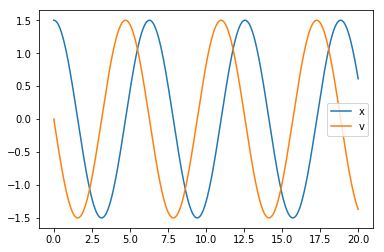

In [10]:
plt.plot(times, yres[:,0], label="x")
plt.plot(times, yres[:,1], label="v")
plt.legend()